# ModelFree Parser Demo
Arthur G. Palmer, III and Michelle L. Gill  
2015/12/06

This IPython notebook demonstartes how to parse various types of ModelFree STAR output files with the library `mfoutparser`. The output of each of the files is returned in two variables, one called `loops`, which is a dictionary containing all of the table  information. (The name is because tables are called `loops` in the ModelFree STAR file.) The second variable, `tags`, is a dictionary containing all other information from various output file sections that does not reside in a table.

The ModelFree output files are parsed with the `parse_mfout` command, which takes a path to the output file as input and returns the two dictionaries mentioned above.

The tag and loop data can all be written to a file using the function `write_all_to_file`, which takes the dictionaries containing the tag and loop data as inputs in addition to an optional file prefix. It will generate a tab-delimited file for each of the tables and the miscellaneous items in the `tags` variable.

General data selection can be accomplished with `get_data_selection` as well as with any Pandas-dataframe compatible method.

A correlation matrix of the correlation values can be created with `make_correlation_matrices` and written to a file using the function `write_correlation_matrix_to_file`. 

`mfoutparser` has been tested on python 2.7 and 3.4. It requires the Numpy (tested on version 1.10.1) and Pandas (tested on version 0.17.1) libraries. Matplotlib is also required if plotting of the data is desired.

In [1]:
import os

# Use sans-serif fonts for plotting
import matplotlib
matplotlib.rcParams[u'font.family'] = [u'sans-serif']
matplotlib.rcParams[u'mathtext.default'] = u'regular'

import matplotlib.pyplot as plt
%matplotlib inline
# %matplotlib notebook # Alternative to `%matplotlib inline` that will make plots interactive

In [2]:
# Import mfoutparser

try:
    # If mfoutparser is in PYTHONPATH (or is installed), then use a direct import
    import mfoutparser as mf
    
except ImportError:
    # Attempt to demo mfoutparser without installing by importing from directory
    mfoutparser_path = '../../mfoutparser'
    
    print("Module mfoutparser was not found in PYTHONPATH. Looking for module in directory '{:s}'\n".format(mfoutparser_path))
    
    if os.path.exists(mfoutparser_path):
        import imp
        mf = imp.load_package('mf', mfoutparser_path)
        print("Module mfoutparser was found in the directory '{:s}' and imported.\n".format(mfoutparser_path))
    else:
        raise ImportError("Module mfoutparser could not be found in the directory '{:s}'.\n".format(mfoutparser_path) + \
        "This demonstration will not run until the module is located.")

Module mfoutparser was not found in PYTHONPATH. Looking for module in directory '../../mfoutparser'

Module mfoutparser was found in the directory '../../mfoutparser' and imported.



In [3]:
help(mf)

Help on package mf:

NAME
    mf

FILE
    /Volumes/Files/research_COL/mfoutparser/mfoutparser/__init__.py

DESCRIPTION
    mfoutparser
    by Arthur G. Palmer, III and Michelle L. Gill
    
    A series of python subroutines to read and extract information from the 
    STAR format mfout file generated by the program ModelFree.
    
    Unlike the BMRB STAR format, the format used by ModelFree 
    uses the data_name field, rather than the save_name field 
    and also allows nested loops (the mfout file has loops nested to 
    a depth of two only).
    
    `mfoutparser` has been tested on python 2.7, 3.4, and 3.5. It requires the 
    Numpy (tested on version 1.10.1) and Pandas (tested on version 0.17.1) 
    libraries. IPython notebook (version >= 3.2.1) is required to run the
    demonstration notebook located in the `examples` directory. Matplotlib 
    is required if plotting of the data is desired.
    
    See the `examples` directory in ../../mfoutparser for a demonstration.

## Single Field Data
Input file: `mfout.singlefield`

In [4]:
help(mf.parse_mfout)

Help on function parse_mfout in module mf.read:

parse_mfout(mfoutfilename)
    Parse a ModelFree output file
    
    Input: path to ModelFree output file
    
    Output: two dictionaries containing data
            and tables. The tables are dataframes,
            as created by Pandas.



In [5]:
help(mf.write_all_to_file)

Help on function write_all_to_file in module mf.write:

write_all_to_file(tag_dict, loop_dict, filename_prefix=u'')
    Write ModelFree parsed data to tab-separated files
    
    Input: dictionaries created by parse_mfout and optional
           filename prefix
    
    Output: tab-separated files



In [6]:
# Create the output directory if necessary
output_directory = 'output'
if not os.path.exists(output_directory):
    os.mkdir(output_directory)

# Parse the ModelFree output file
input_directory = 'input_data'
mfoutfilename = os.sep.join([input_directory, 'mfout.singlefield'])
tags, loops = mf.parse_mfout(mfoutfilename)

# Write everything to a file
output_filename = os.sep.join([output_directory, 'mfout_singlefield'])
mf.write_all_to_file(tags, loops, output_filename)

### Overview of `tags` and `loops` data structure

Preview the returned tags.

In [7]:
tags.keys()

[u'header', u'chi_square']

In [8]:
tags['header']

,tag,value
0,modelfree_version,4.20
1,date,Tue Jun 2 16:32:50 2015
2,input_file,mfinput.3
3,model_file,mfmodel.final
4,data_file,ubiquitin.MFDATA
5,parameter_file,ubiquitin.MFPAR
6,simulation_file,none
7,optimization,tval
8,seed,-1985
9,search,grid


In [9]:
tags['chi_square']

,tag,value
0,total_x2,162.5621


Preview the returned loops (tables).

In [10]:
loops.keys()

[u'title',
 u'chi_square',
 u'diffusion_tensor',
 u'spin_parameters',
 u'relaxation',
 u'model_1',
 u'sse',
 u'correlation_matrix',
 u'header_1',
 u'header_2',
 u'header_3']

In [11]:
loops['header_1']

,algorithm_option
0,grid
1,1


In [12]:
loops['header_2']

,sim_algorithm_option
0,grid
1,1


In [13]:
loops['header_3']

,1h_fields
0,500.130


In [14]:
loops['chi_square']

,percentile,simulated_x2
0,0.05,76.6330
1,0.10,80.5183
2,0.15,84.7426
3,0.20,86.6203
4,0.25,88.8367
5,0.30,90.8813
6,0.35,93.7625
7,0.40,95.4758
8,0.45,97.3946
9,0.50,99.7756


In [15]:
loops['relaxation']

,relaxation_rate_name,relaxation_rate_unit,field,residue,value,uncertainty,flag,fit_value,t-value
0,R1,(1/s),500.13,2,2.392,0.032,1,2.395,-0.11500
1,R1,(1/s),500.13,3,2.595,0.070,1,2.605,-0.14900
2,R1,(1/s),500.13,4,2.620,0.041,1,2.608,0.29500
3,R1,(1/s),500.13,5,2.541,0.043,1,2.519,0.51900
4,R1,(1/s),500.13,6,2.718,0.019,1,2.712,0.30000
5,R1,(1/s),500.13,7,2.519,0.023,1,2.517,0.09980
6,R1,(1/s),500.13,8,2.561,0.045,1,2.536,0.55400
7,R1,(1/s),500.13,9,2.335,0.043,1,2.332,0.06880
8,R1,(1/s),500.13,10,2.412,0.042,1,2.404,0.17200
9,R1,(1/s),500.13,11,2.262,0.023,1,2.250,0.52000


### Selecting and plotting data

Extract data using a given parameter as an inequality using the `get_data_selection` function. The selection is based on `selector_dict` which is a dictionary whose key corresponds to the column name and value corresponds to the selected value. Multiple criteria can be used, as shown below. 

The function will accept a specific (in)equality parameter as a string (`'=='`, `'<'`, `'>'`, `'<='`, `'>='`) and `'=='` is the default. To combine selections with different inequalities, simply call the command additional times on the previous command's output.

In [16]:
help(mf.get_data_selection)

Help on function get_data_selection in module mf.selector:

get_data_selection(dataframe, selector_dict, selector_type='==', copy=True)
    Return a dataframe containing data that matches all
    the criteria defined by `selector_dict`, which is a
    dictionary whose keys are the column name and values
    are the match criterion.
    Note that a copy of the original dataframe is made
    by default so any changes made to new data will not be
    reflected in the original data. 
    
    Input: Pandas dataframe, dictionary of selector values, selector type, 
           and copy
    
           selector_type is one of ['==' , '<', '>', '<=', '>=' ] and '=='
           is the default
           
           copy is True (default) or False and determines if a copy of the
           dataframe is made or not
    
    Output: Pandas dataframe for corresponding match



This command will extract all relaxation data for residues whose numbers are <= 5:

In [17]:
selector_dict = {'residue':5}
residue_5_rates = mf.get_data_selection(loops['relaxation'], selector_dict, '<=')
residue_5_rates

,relaxation_rate_name,relaxation_rate_unit,field,residue,value,uncertainty,flag,fit_value,t-value
0,R1,(1/s),500.13,2,2.392,0.032,1,2.395,-0.1150
1,R1,(1/s),500.13,3,2.595,0.070,1,2.605,-0.1490
2,R1,(1/s),500.13,4,2.620,0.041,1,2.608,0.2950
3,R1,(1/s),500.13,5,2.541,0.043,1,2.519,0.5190
4,R2,(1/s),500.13,2,5.656,0.315,1,5.500,0.4960
5,R2,(1/s),500.13,3,6.181,0.407,1,6.030,0.3730
6,R2,(1/s),500.13,4,5.755,0.303,1,6.037,-0.9320
7,R2,(1/s),500.13,5,5.819,0.045,1,5.830,-0.2300
8,NOE,(),500.13,2,0.665,0.020,1,0.666,-0.0226
9,NOE,(),500.13,3,0.699,0.038,1,0.728,-0.7640


This command will extract data for a given relaxation parameter at a specific field strength (R1 data at 500 MHz).

In [18]:
selector_dict = {'relaxation_rate_name':'R1', 'field':500.13}
r1_data = mf.get_data_selection(loops['relaxation'], selector_dict)
r1_data

,relaxation_rate_name,relaxation_rate_unit,field,residue,value,uncertainty,flag,fit_value,t-value
0,R1,(1/s),500.13,2,2.392,0.032,1,2.395,-0.115000
1,R1,(1/s),500.13,3,2.595,0.070,1,2.605,-0.149000
2,R1,(1/s),500.13,4,2.620,0.041,1,2.608,0.295000
3,R1,(1/s),500.13,5,2.541,0.043,1,2.519,0.519000
4,R1,(1/s),500.13,6,2.718,0.019,1,2.712,0.300000
5,R1,(1/s),500.13,7,2.519,0.023,1,2.517,0.099800
6,R1,(1/s),500.13,8,2.561,0.045,1,2.536,0.554000
7,R1,(1/s),500.13,9,2.335,0.043,1,2.332,0.068800
8,R1,(1/s),500.13,10,2.412,0.042,1,2.404,0.172000
9,R1,(1/s),500.13,11,2.262,0.023,1,2.250,0.520000


Plot the selected R1 data.

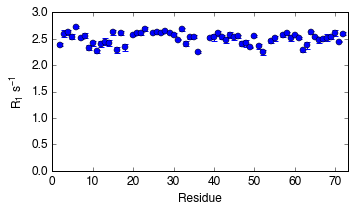

In [19]:
fig = plt.gcf()
fig.set_size_inches(5,3)

ax = plt.axes()

# The extra ".values" property is sometimes required with certain Matplotlib and Pandas version combinations
ax.errorbar(r1_data.residue.values, r1_data.value.values, yerr=r1_data.uncertainty.values, 
             color='blue', marker='o', ls='', capthick=1.0)

# Using periods followed by the column name is a shortcut for this:
# ax.errorbar(r1_data['residue'].values, r1_data['value'].values, yerr=r1_data['uncertainty'].values, 
#              color='blue', marker='o', ls='', capthick=1.0)

ax.set_ylim(0,3)
ax.set_xlim(0, r1_data.residue.max()+1)
ax.set_xlabel('Residue')
ax.set_ylabel('$R_1$ $s^{-1}$')

# Set the fontsize for the label and tick labels
fontsize = 12.0
ax.xaxis.label.set_fontsize(fontsize)
ax.yaxis.label.set_fontsize(fontsize)
for tick in ax.xaxis.get_ticklabels():
    tick.set_fontsize(fontsize)
for tick in ax.yaxis.get_ticklabels():
    tick.set_fontsize(fontsize)

fig.tight_layout()

output_filename = os.sep.join([output_directory, 'R1_500MHz_plot.pdf'])
fig.savefig(output_filename)
output_filename = os.sep.join([output_directory, 'R1_500MHz_plot.png'])
fig.savefig(output_filename, dpi=300)

Select a Model-free parameter and plot.

In [20]:
loops['model_1']

,model_free_name,model_free_unit,residue,fit_value,fit_error,flag,sim_value,sim_error,sim_abs,geary-z
0,S2,(),2,0.796,0.011,1,0.796,0.011,0.009,-1.278
1,S2,(),3,0.878,0.022,1,0.878,0.022,0.018,1.451
2,S2,(),4,0.879,0.013,1,0.880,0.013,0.011,1.447
3,S2,(),5,0.849,0.006,1,0.849,0.006,0.005,-0.152
4,S2,(),6,0.914,0.006,1,0.914,0.006,0.004,-1.886
5,S2,(),7,0.839,0.008,1,0.839,0.008,0.006,0.658
6,S2,(),8,0.820,0.012,1,0.819,0.012,0.010,1.802
7,S2,(),9,0.760,0.014,1,0.761,0.014,0.011,0.818
8,S2,(),10,0.767,0.014,1,0.767,0.014,0.011,0.872
9,S2,(),11,0.732,0.009,1,0.732,0.008,0.006,1.223


In [21]:
selector_dict = {'model_free_name':'S2'}
s2_data = mf.get_data_selection(loops['model_1'], selector_dict)

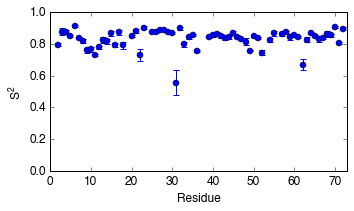

In [22]:
fig = plt.gcf()
fig.set_size_inches(5,3)

ax = plt.axes()
ax.errorbar(s2_data.residue.values, s2_data.fit_value.values, yerr=s2_data.sim_error.values, 
             color='blue', marker='o', ls='', capthick=1.0)

ax.set_ylim(0,1)
ax.set_xlim(0, s2_data.residue.max()+1)
ax.set_xlabel('Residue')
ax.set_ylabel('$S^2$')

# Set the fontsize for the label and tick labels
fontsize = 12.0
ax.xaxis.label.set_fontsize(fontsize)
ax.yaxis.label.set_fontsize(fontsize)
for tick in ax.xaxis.get_ticklabels():
    tick.set_fontsize(fontsize)
for tick in ax.yaxis.get_ticklabels():
    tick.set_fontsize(fontsize)

fig.tight_layout()

output_filename = os.sep.join([output_directory, 'S2_plot.pdf'])
fig.savefig(output_filename)
output_filename = os.sep.join([output_directory, 'S2_plot.png'])
fig.savefig(output_filename, dpi=300)

### Creation of a correlation matrix

The correlation table can also be manipulated so the values are converted to a true matrix representation. Values that are missing are undefined.

In [23]:
help(mf.make_correlation_matrices)

Help on function make_correlation_matrices in module mf.correlation:

make_correlation_matrices(dataframe)
    Convert a dataframe of correlation data into a matrix
    
    Input: Pandas dataframe containing correlation data
    
    Output: Pandas dataframe with data manipulated into matrices



In [24]:
correlation_matrix = mf.make_correlation_matrices(loops['correlation_matrix'])
correlation_matrix

Rex  S2f     S2s  Theta      te
residue model_free_name_1                                 
2       S2s                NaN  NaN  1.0000    NaN -0.0751
        Theta              NaN  NaN  0.0000      1  0.0000
        te                 NaN  NaN     NaN    NaN  1.0000
3       S2s                NaN  NaN  1.0000    NaN     NaN
        Theta              NaN  NaN  0.0000      1     NaN
4       S2s                NaN  NaN  1.0000    NaN     NaN
        Theta              NaN  NaN  0.0000      1     NaN
5       S2s                NaN  NaN  1.0000    NaN     NaN
        Theta              NaN  NaN  0.0000      1     NaN
6       S2s                NaN  NaN  1.0000    NaN     NaN
        Theta              NaN  NaN  0.0000      1     NaN
7       S2s                NaN  NaN  1.0000    NaN -0.2247
        Theta              NaN  NaN  0.0000      1  0.0000
        te                 NaN  NaN     NaN    NaN  1.0000
8       S2s                NaN  NaN  1.0000    NaN  0.7316
        Theta              NaN  NaN  0.0000      1  0.0000
        te                 NaN  NaN     NaN    NaN  1.0000
9       S2s                NaN  NaN  1.0000    NaN  0.6925
        Theta              NaN  NaN  0.0000      1  0.0000
        te                 NaN  NaN     NaN    NaN  1.0000
10      S2s                NaN  NaN  1.0000    NaN  0.5564
        Theta              NaN  NaN  0.0000      1  0.0000
        te                 NaN  NaN     NaN    NaN  1.0000
11      S2s                NaN  NaN  1.0000    NaN -0.2858
        Theta              NaN  NaN  0.0000      1  0.0000
        te                 NaN  NaN     NaN    NaN  1.0000
12      S2s                NaN  NaN  1.0000    NaN  0.6558
        Theta              NaN  NaN  0.0000      1  0.0000
        te                 NaN  NaN     NaN    NaN  1.0000
13      S2s                NaN  NaN  1.0000    NaN     NaN
...                        ...  ...     ...    ...     ...
60      S2s                NaN  NaN  1.0000    NaN -0.2373
        Theta              NaN  NaN  0.0000      1  0.0000
        te                 NaN  NaN     NaN    NaN  1.0000
61      S2s                NaN  NaN  1.0000    NaN     NaN
        Theta              NaN  NaN  0.0000      1     NaN
62      S2f                NaN    1 -0.2861    NaN -0.1449
        S2s                NaN  NaN  1.0000    NaN -0.7954
        Theta              NaN    0  0.0000      1  0.0000
        te                 NaN  NaN     NaN    NaN  1.0000
63      S2s                NaN  NaN  1.0000    NaN     NaN
        Theta              NaN  NaN  0.0000      1     NaN
64      S2s                NaN  NaN  1.0000    NaN     NaN
        Theta              NaN  NaN  0.0000      1     NaN
65      S2s                NaN  NaN  1.0000    NaN     NaN
        Theta              NaN  NaN  0.0000      1     NaN
66      S2s                NaN  NaN  1.0000    NaN     NaN
        Theta              NaN  NaN  0.0000      1     NaN
67      S2s                NaN  NaN  1.0000    NaN     NaN
        Theta              NaN  NaN  0.0000      1     NaN
68      S2s                NaN  NaN  1.0000    NaN     NaN
        Theta              NaN  NaN  0.0000      1     NaN
69      S2s                NaN  NaN  1.0000    NaN     NaN
        Theta              NaN  NaN  0.0000      1     NaN
70      S2s                NaN  NaN  1.0000    NaN     NaN
        Theta              NaN  NaN  0.0000      1     NaN
71      S2s                NaN  NaN  1.0000    NaN -0.0413
        Theta              NaN  NaN  0.0000      1  0.0000
        te                 NaN  NaN     NaN    NaN  1.0000
72      S2s                NaN  NaN  1.0000    NaN     NaN
        Theta              NaN  NaN  0.0000      1     NaN

[161 rows x 5 columns]

The matrix corresponding to a single residue can be selected as before.

In [25]:
selector_dict = {'residue':2}
residue2_correlation_matrix = mf.get_data_selection(correlation_matrix, selector_dict)
residue2_correlation_matrix

Rex  S2f  S2s  Theta      te
residue model_free_name_1                              
2       S2s                NaN  NaN    1    NaN -0.0751
        Theta              NaN  NaN    0      1  0.0000
        te                 NaN  NaN  NaN    NaN  1.0000

And just the values of this matrix can be extracted as a numpy two-dimensional array for use in statistical analysis.

In [26]:
residue2_correlation_matrix.values

array([[    nan,     nan,  1.    ,     nan, -0.0751],
       [    nan,     nan,  0.    ,  1.    ,  0.    ],
       [    nan,     nan,     nan,     nan,  1.    ]])

Parts of the matrix can be extracted as normal with numpy arrays. Here are just the $S^2_s$, $\Theta$, and $\tau_E$ elements.

In [27]:
residue2_correlation_matrix.values[:, 2:]

array([[ 1.    ,     nan, -0.0751],
       [ 0.    ,  1.    ,  0.    ],
       [    nan,     nan,  1.    ]])

The correlation matrix can be written to a file as well. The filename will have the text `correlation_matrix_pivot` added to it.

In [28]:
help(mf.write_correlation_matrix_to_file)

Help on function write_correlation_matrix_to_file in module mf.write:

write_correlation_matrix_to_file(dataframe, filename_prefix=u'', na_rep=u'')
    Write pivoted correlation matrix to file
    
    Input: dataframe created by `make_correlation_matrices`, optional
           filename prefix, and the value to use for undefined entries 
           (left empty by default)
    
    Output: tab-separated file named with `filename_prefix` 
            and 'correlation_matrix_pivot'



In [29]:
output_filename = os.sep.join([output_directory, 'mfout_singlefield_loop'])
mf.write_correlation_matrix_to_file(correlation_matrix, output_filename)

## Multiple Model Data
Input file: `mfout.compare`

In [30]:
# Parse the ModelFree output file
mfoutfilename = os.sep.join([input_directory, 'mfout.compare'])
tags, loops = mf.parse_mfout(mfoutfilename)

# Write everything to a file
output_filename = os.sep.join([output_directory, 'mfout_compare'])
mf.write_all_to_file(tags, loops, output_filename)

In [31]:
loops['F_dist']

,residue,f-stat,f-simulations,percentile,simulated_f_dist
0,2,37.625130,208,0.05,1.100000e-07
1,2,37.625130,208,0.10,5.200000e-07
2,2,37.625130,208,0.15,1.180000e-06
3,2,37.625130,208,0.20,2.310000e-06
4,2,37.625130,208,0.25,4.350000e-06
5,2,37.625130,208,0.30,2.558600e-04
6,2,37.625130,208,0.35,8.076880e-03
7,2,37.625130,208,0.40,5.292762e-02
8,2,37.625130,208,0.45,1.078059e-01
9,2,37.625130,208,0.50,1.703087e-01


In [32]:
loops['model_2']

,model_free_name,model_free_unit,residue,fit_value,fit_error,flag
0,S2,(),2,0.796,0.011,1
1,S2,(),7,0.839,0.008,1
2,S2,(),8,0.820,0.012,1
3,S2,(),9,0.760,0.014,1
4,S2,(),10,0.767,0.014,1
5,S2,(),11,0.732,0.009,1
6,S2,(),12,0.781,0.010,1
7,S2,(),15,0.869,0.015,1
8,S2,(),20,0.853,0.007,1
9,S2,(),33,0.800,0.016,1


## Multiple Field Data
Input file: `mfout.multifield`

In [33]:
# Parse the ModelFree output file
mfoutfilename = os.sep.join([input_directory, 'mfout.multifield'])
tags, loops = mf.parse_mfout(mfoutfilename)

# Write everything to a file
output_filename = os.sep.join([output_directory, 'mfout_multifield'])
mf.write_all_to_file(tags, loops, output_filename)

In [34]:
loops['relaxation']

,relaxation_rate_name,relaxation_rate_unit,field,residue,value,uncertainty,flag,fit_value,t-value
0,R1,(1/s),499.7,2,1.210,0.027,1,1.204,0.231
1,R1,(1/s),499.7,5,1.497,0.033,1,1.555,-1.780
2,R1,(1/s),499.7,6,1.510,0.030,1,1.518,-0.267
3,R1,(1/s),499.7,8,1.572,0.022,1,1.674,-4.610
4,R1,(1/s),499.7,9,1.621,0.024,1,1.681,-2.450
5,R1,(1/s),499.7,10,1.605,0.038,1,1.676,-1.890
6,R1,(1/s),499.7,11,1.622,0.032,1,1.613,0.270
7,R1,(1/s),499.7,13,1.453,0.020,1,1.488,-1.730
8,R1,(1/s),499.7,14,1.678,0.027,1,1.585,3.410
9,R1,(1/s),499.7,15,1.214,0.012,1,1.111,8.840
